In [3]:
import sklearn
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x, y = mglearn.datasets.make_wave(n_samples = 60) 
x_train, x_test , y_train , y_test = train_test_split(x,y , random_state = 42)

lr = LinearRegression().fit(x_train , y_train)

In [4]:
lr.coef_

array([0.39390555])

In [5]:
lr.intercept_

-0.031804343026759746

In [9]:
print("훈련세트 점수 {:.2f} ".format(lr.score(x_train, y_train)))

훈련세트 점수 0.67 


In [10]:
from pandas import Series, DataFrame

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [14]:
df1 = pd.DataFrame({'key' :['b','b','a','c','a','a','b'], 'data1' : range(7)})
df2 = pd.DataFrame({'key':['a','b','d'], 'data2' : range(3)})

In [15]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [16]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [17]:
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [18]:
pd.merge(df1, df2 , on = 'key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [19]:
pd.merge(df1,df2, how = 'outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [21]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [22]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [23]:
pd.merge(df1,df2, how = 'inner')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [24]:
pd.merge(df1,df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [32]:
left1 = pd.DataFrame({'key' :['a','b','a','a','b','c'], 'value' : range(6)})
right1 = pd.DataFrame({'group_val' : [3.5 , 7]}, index = ['a','b'])

In [35]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [36]:
right1

,group_val
a,3.5
b,7.0


In [37]:
pd.merge(left1 , right1 , left_on = 'key', right_index = True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [38]:
s1 = Series([0,1], index = ['a','b'])
s2 = Series([2,3,4], index = ['c','d','e'])
s3 = Series([5,6], index = ['f','g'])

In [40]:
pd.concat([s1,s2,s3] , axis = 1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [41]:
s4 = pd.concat([s1*5, s3])

In [42]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [43]:
pd.concat([s1,s4], axis =1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [44]:
pd.concat([s1,s4], axis =1 , join = 'inner')

,0,1
a,0,0
b,1,5


In [45]:
s1

a    0
b    1
dtype: int64

In [47]:
s4

a    0
b    5
f    5
g    6
dtype: int64

In [48]:
from pandas import Series , DataFrame

In [49]:
result = pd.concat([s1,s3,s3], keys = ['one','two','three'])

In [50]:
result

one    a    0
       b    1
two    f    5
       g    6
three  f    5
       g    6
dtype: int64

In [51]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,NaN,NaN,5.0,6.0
three,NaN,NaN,5.0,6.0


In [52]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), index = ['a','b','c'], columns = ['one','two'])
df2 = pd.DataFrame(5+ np.arange(4).reshape(2,2) , index = ['a','c'], columns = ['three','four'])

In [53]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [54]:
df2

,three,four
a,5,6
c,7,8


In [55]:
pd.concat([df1, df2 ] , axis =1 , keys = ['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [56]:
pd.concat([df1, df2 ] ,  keys = ['level1','level2'])

four  one  three  two
level1 a   NaN  0.0    NaN  1.0
       b   NaN  2.0    NaN  3.0
       c   NaN  4.0    NaN  5.0
level2 a   6.0  NaN    5.0  NaN
       c   8.0  NaN    7.0  NaN

In [57]:
df1 = pd.DataFrame(np.random.randn(3,4),  columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.random.randn(2,3) , columns = ['b','d','a'])

In [58]:
df1

,a,b,c,d
0,-0.258026,-0.012844,-0.588913,-1.137978
1,-0.464112,-1.816910,-0.654678,-2.137551
2,-0.803839,2.095807,0.066919,1.747918


In [59]:
df2

,b,d,a
0,1.323119,1.139751,0.123870
1,-0.185224,-0.149898,-1.195597


In [60]:
pd.concat([df1,df2], ignore_index = True)

,a,b,c,d
0,-0.258026,-0.012844,-0.588913,-1.137978
1,-0.464112,-1.816910,-0.654678,-2.137551
2,-0.803839,2.095807,0.066919,1.747918
3,0.123870,1.323119,NaN,1.139751
4,-1.195597,-0.185224,NaN,-0.149898


In [62]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan], index = ['f','e','d','c','b','a'])
b = Series(np.arange(len(a), dtype = np.float64), index = ['f','e','d','c','b','a'])

In [63]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [64]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

In [66]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [67]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b' : [np.nan, 2. , np.nan , 6.],
                    'c' : range(2,18,4)})

In [68]:
df2 = pd.DataFrame({'a': [5.,4.,np.nan, 3., 7.], 
                    'b': [np.nan, 3., 4., 6., 8.]})

In [69]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [70]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [71]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [73]:
str.lower('A')

'a'

In [74]:
'A'.lower()

'a'

In [75]:
a = {'a' : 1}

In [76]:
a

{'a': 1}

In [78]:
a['a']

1

In [79]:
import scipy

In [80]:
scipy.nan

nan

In [81]:
np.nan

nan

In [87]:
data = pd.DataFrame(np.arange(12).reshape((3,4)), index = ['Ohio','colorado','new york'], 
                   columns = ['one','two','three','four'])

In [88]:
data

,one,two,three,four
Ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [89]:
data.index.map(str.lower)

Index(['ohio', 'colorado', 'new york'], dtype='object')

In [91]:
data.index = data.index.map(str.lower)

In [92]:
data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [93]:
data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [95]:
data.rename(index = str.title, columns = str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [96]:
data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [97]:
ages = [20, 22, 25, 27, 21, 23, 37, 61, 45, 41, 32]

In [98]:
bins = [18, 25, 35, 60 ,100]

In [99]:
cats = pd.cut(ages, bins)

In [100]:
cats 

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (35, 60], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 11
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [101]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     2
(60, 100]    1
dtype: int64

In [104]:
scipy.random.seed(12345)

data = DataFrame(scipy.random.randn(1000,4))

In [105]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [106]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.248944,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [108]:
col = data[3]

In [109]:
col[scipy.absolute(col) >3 ]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [110]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.248944,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [113]:
data[ (scipy.absolute(data) >3).any(1) ]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [120]:
import scipy as s 
data[(scipy.absolute(data) >3)] = s.sign(data)*3

In [121]:
data

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570
5,-0.539741,0.476985,3.000000,-1.021228
6,-0.577087,0.124121,0.302614,0.523772
7,0.000940,1.343810,-0.713544,-0.831154
8,-2.370232,-1.860761,-0.860757,0.560145
9,-1.265934,0.119827,-1.063512,0.332883


In [122]:
df = DataFrame(np.arange(5*4).reshape(5,4))

In [123]:
sampler = np.random.permutation(5)

In [124]:
sampler

array([1, 0, 2, 3, 4])

In [126]:
s.rand(100).shape

(100,)

In [127]:
import scipy as sp

In [129]:
sp.absolute

<ufunc 'absolute'>

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt

In [159]:
fig  = plt.figure()

In [160]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

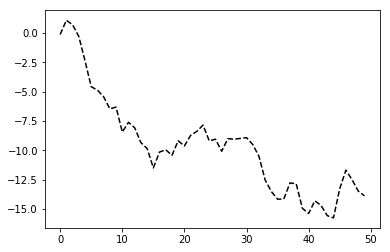

In [163]:
plt.plot(sp.randn(50).cumsum(), 'k--')

In [171]:
sp.randn(50).cumsum()

array([-0.21241843,  0.48784749, -0.62693926, -0.84645473, -0.20313929,
        0.66875988, -0.08005519, -1.28212027,  0.35296186,  0.1914755 ,
        0.41660569,  0.15900848, -1.12044407, -1.20008056, -0.13380281,
       -1.03343999, -1.59163154, -2.97231273, -2.32037186, -2.50512195,
       -3.50346788, -3.76435121, -2.66852176, -1.9453869 , -0.62229089,
       -2.9877218 , -2.75328786, -3.63698118, -5.00844907, -5.2081183 ,
       -5.16346289, -6.17514149, -6.0407606 , -4.49346952, -3.94504535,
       -4.22962598, -2.17716341, -0.93533085, -1.10266547, -0.43902035,
       -3.2787958 , -3.72621293, -3.39663502, -3.50871052, -3.75090649,
       -5.3720555 , -5.45851071, -6.77279036, -8.27483063, -8.44354217])

In [175]:
_ = ax1.hist(sp.randn(100), bins = 20, color = 'k', alpha = 0.3)

In [177]:
%matplotlib inline
ax1

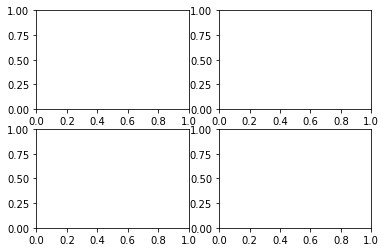

In [179]:
fig, axes = plt.subplots(2,2)

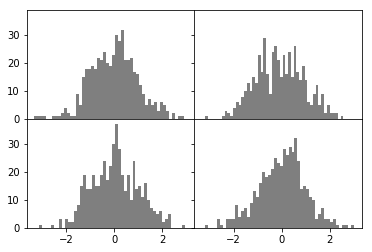

In [181]:
fig ,axes = plt.subplots(2,2, sharex = True , sharey = True) 
for i in range(2) :
     for j in range(2) : 
            axes[i,j].hist(sp.randn(500), bins = 50 , color ='k', alpha = 0.5)
plt.subplots_adjust(wspace=  0 , hspace = 0 )

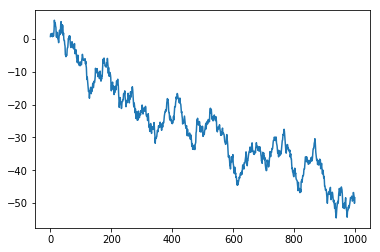

In [184]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp.randn(1000).cumsum())

In [190]:
ax.set_xticks([0,250, 500, 750, 1000])
#ax.set_xticklabels(['one','two','three','four','five'], rotation = 30 , fontsize = 'small')

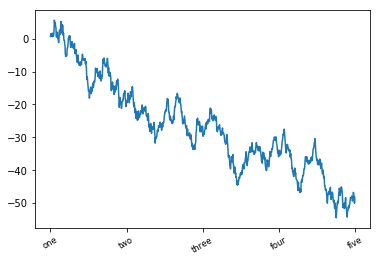

In [191]:
fig

In [193]:
df = DataFrame(np.random.randn(10,4).cumsum(0), columns = ['A','B','C','D'], index = np.arange(0, 100 ,10))

In [194]:
df

,A,B,C,D
0,-1.826819,1.901489,0.640474,2.373161
10,-2.679474,1.495526,1.437597,2.309021
20,-2.164809,-0.282410,1.206134,1.061988
30,-0.994928,-1.179601,1.212265,0.916741
40,-1.501467,-1.914511,0.357369,0.343093
50,-1.492739,-3.112115,1.421049,0.960465
60,-0.883472,-2.252196,1.114107,1.895613
70,-0.461928,-0.972424,0.440693,0.709190
80,-1.783357,-0.681240,0.627837,2.790966
90,-3.717165,-0.821722,0.515869,2.590230


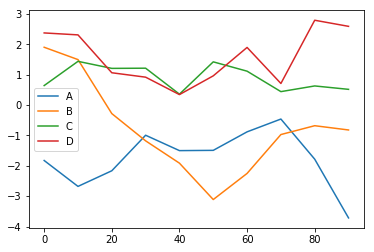

In [195]:
df.plot()

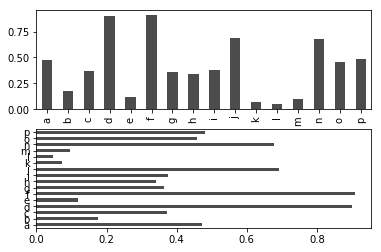

In [197]:
fig, axes = plt.subplots(2,1)

data = Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot(kind = 'bar' , ax = axes[0], color = 'k' , alpha = 0.7)
data.plot(kind = 'barh' , ax = axes[1], color = 'k', alpha = 0.7)